INFO:  Logger initialized
INFO: Step: 5000, Time: 3.60e+07, KE: 4.86e-06, CFL: 0.023
INFO: Step: 10000, Time: 7.20e+07, KE: 4.14e-04, CFL: 0.139
INFO: Step: 15000, Time: 1.08e+08, KE: 5.65e-04, CFL: 0.212
INFO: Step: 20000, Time: 1.44e+08, KE: 5.90e-04, CFL: 0.192
INFO: Step: 25000, Time: 1.80e+08, KE: 5.74e-04, CFL: 0.193
INFO: Step: 30000, Time: 2.16e+08, KE: 5.93e-04, CFL: 0.230
INFO: Step: 35000, Time: 2.52e+08, KE: 6.28e-04, CFL: 0.204
INFO: Step: 40000, Time: 2.88e+08, KE: 5.98e-04, CFL: 0.280
INFO: Step: 45000, Time: 3.24e+08, KE: 6.68e-04, CFL: 0.255
INFO: Step: 50000, Time: 3.60e+08, KE: 5.87e-04, CFL: 0.205
INFO: Step: 55000, Time: 3.96e+08, KE: 5.62e-04, CFL: 0.198
INFO: Step: 60000, Time: 4.32e+08, KE: 5.81e-04, CFL: 0.206
INFO: Step: 65000, Time: 4.68e+08, KE: 6.26e-04, CFL: 0.227
INFO: Step: 70000, Time: 5.04e+08, KE: 6.33e-04, CFL: 0.234
INFO: Step: 75000, Time: 5.40e+08, KE: 5.86e-04, CFL: 0.205
INFO: Step: 80000, Time: 5.76e+08, KE: 6.09e-04, CFL: 0.209
INFO: Step: 850

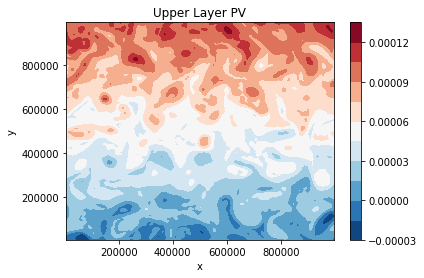

In [31]:
#this cell just runs the first example on the PYQG documentation(two layer ocean) 
# https://pyqg.readthedocs.io/en/latest/examples/two-layer.html

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pyqg

year = 24*60*60*360.
m = pyqg.QGModel(nx=128, tmax=20*year, twrite=5000, tavestart=5*year)
m.run()

q_upper = m.q[0] + m.Qy[0]*m.y #this line 
plt.contourf(m.x, m.y, q_upper, 12, cmap='RdBu_r')
plt.xlabel('x'); plt.ylabel('y'); plt.title('Upper Layer PV')
plt.colorbar();

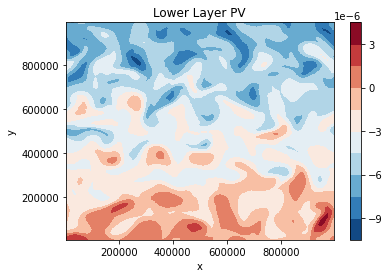

In [34]:
q_upper = m.q[1] + m.Qy[1]*m.y
plt.contourf(m.x, m.y, q_upper, 12, cmap='RdBu_r')
plt.xlabel('x'); plt.ylabel('y'); plt.title('Lower Layer PV')
plt.colorbar();

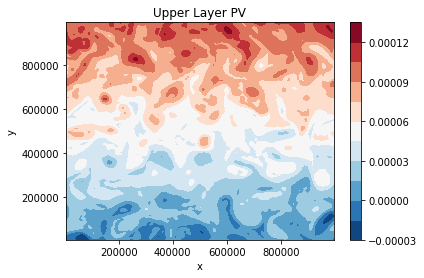

In [32]:
q_upper = m.q[0] + m.Qy[0]*m.y
plt.contourf(m.x, m.y, q_upper, 12, cmap='RdBu_r')
plt.xlabel('x'); plt.ylabel('y'); plt.title('Upper Layer PV')
plt.colorbar();

In [2]:
m.describe_diagnostics()

NAME               | DESCRIPTION
--------------------------------------------------------------------------------
APEflux    | spectral flux of available potential energy           
APEgen     | total APE generation                                  
APEgenspec | spectrum of APE generation                            
EKE        | mean eddy kinetic energy                              
EKEdiss    | total energy dissipation by bottom drag               
Ensspec    | enstrophy spectrum                                    
KEflux     | spectral flux of kinetic energy                       
KEspec     |  kinetic energy spectrum                              
entspec    | barotropic enstrophy spectrum                         
q          | QGPV                                                  


In [3]:
#now to try to run the three layer model(proper PYQG)
from pyqg import diagnostic_tools as tools
#this sets up the layers
L =  1000.e3     # length scale of box    [m]
Ld = 15.e3       # deformation scale      [m]
kd = 1./Ld       # deformation wavenumber [m^-1]
Nx = 64          # number of grid points

H1 = 500.        # layer 1 thickness  [m]
H2 = 1750.       # layer 2
H3 = 1750.       # layer 3

U1 = 0.05          # layer 1 zonal velocity [m/s]
U2 = 0.025         # layer 2
U3 = 0.00          # layer 3

rho1 = 1025.
rho2 = 1025.275
rho3 = 1025.640

rek = 1.e-7       # linear bottom drag coeff.  [s^-1]
f0  = 0.0001236812857687059 # coriolis param [s^-1]
beta = 1.2130692965249345e-11 # planetary vorticity gradient [m^-1 s^-1]

Ti = Ld/(abs(U1))  # estimate of most unstable e-folding time scale [s]
dt = Ti/200.   # time-step [s]
tmax = 300*Ti      # simulation time [s]


In [4]:
#this defines the model from all of the set-up parameters above
m = pyqg.LayeredModel(nx=Nx, nz=3, U = [U1,U2,U3],V = [0.,0.,0.],L=L,f=f0,beta=beta,
                         H = [H1,H2,H3], rho=[rho1,rho2,rho3],rek=rek,
                        dt=dt,tmax=tmax, twrite=5000, tavestart=Ti*10)

INFO:  Logger initialized


In [5]:
#this sets up the initial conditions for the model
sig = 1.e-7
qi = sig*np.vstack([np.random.randn(m.nx,m.ny)[np.newaxis,],
                    np.random.randn(m.nx,m.ny)[np.newaxis,],
                    np.random.randn(m.nx,m.ny)[np.newaxis,]])
m.set_q(qi)

/mnt/local/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  
/mnt/local/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]
/mnt/local/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify 

Text(0.5, 1.0, 'Layer 3 PV')

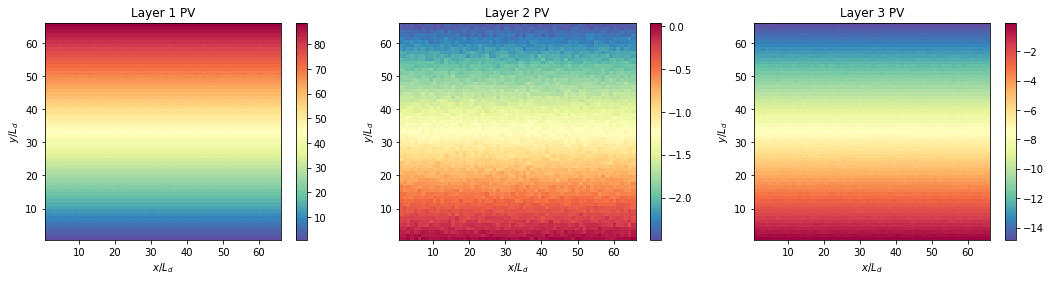

In [6]:
#we want to see the PV of the three layers before we run the model 
#this visualizes the initial conditions
plt.figure(figsize=(18,4))

plt.subplot(131)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[0,]+m.Qy[0]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 1 PV')

plt.subplot(132)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[1,]+m.Qy[1]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 2 PV')

plt.subplot(133)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[2,]+m.Qy[2]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 3 PV')

In [7]:
#now, we run the model 
m.run()

INFO: Step: 5000, Time: 7.50e+06, KE: 3.07e-06, CFL: 0.005
INFO: Step: 10000, Time: 1.50e+07, KE: 2.16e-04, CFL: 0.010
INFO: Step: 15000, Time: 2.25e+07, KE: 6.38e-03, CFL: 0.050
INFO: Step: 20000, Time: 3.00e+07, KE: 2.80e-02, CFL: 0.130
INFO: Step: 25000, Time: 3.75e+07, KE: 7.79e-02, CFL: 0.158
INFO: Step: 30000, Time: 4.50e+07, KE: 1.77e-01, CFL: 0.200
INFO: Step: 35000, Time: 5.25e+07, KE: 2.02e-01, CFL: 0.166
INFO: Step: 40000, Time: 6.00e+07, KE: 2.89e-01, CFL: 0.250
INFO: Step: 45000, Time: 6.75e+07, KE: 4.76e-01, CFL: 0.236
INFO: Step: 50000, Time: 7.50e+07, KE: 5.00e-01, CFL: 0.219
INFO: Step: 55000, Time: 8.25e+07, KE: 7.14e-01, CFL: 0.286
INFO: Step: 60000, Time: 9.00e+07, KE: 4.92e-01, CFL: 0.211


/mnt/local/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """
/mnt/local/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == '':
/mnt/local/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either

Text(0.5, 1.0, 'Layer 3 PV')

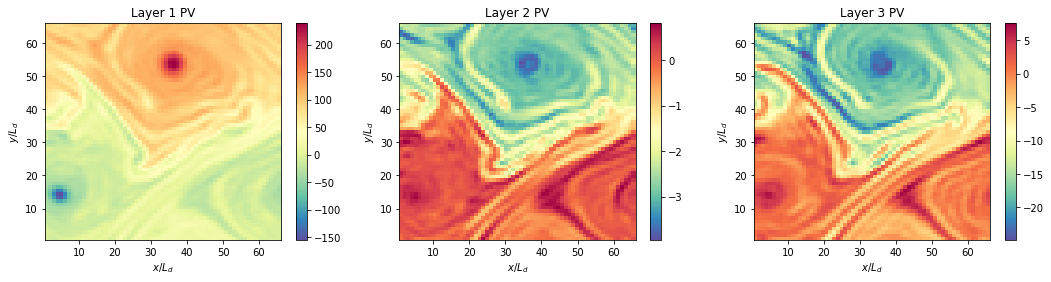

In [8]:
#now this visualizes the results
plt.figure(figsize=(18,4))

plt.subplot(131)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[0,]+m.Qy[0]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 1 PV')

plt.subplot(132)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[1,]+m.Qy[1]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 2 PV')

plt.subplot(133)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[2,]+m.Qy[2]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 3 PV')

In [9]:
print ("The first baroclinic deformation radius is", m.radii[1]/1.e3, "km")

The first baroclinic deformation radius is 15.375382785987185 km


/mnt/local/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Layer 1 PV')

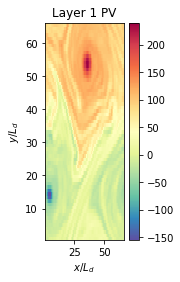

In [10]:
#trying to create my own plot based off 3-layer flow example
plt.subplot(131)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[0,]+m.Qy[0]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 1 PV')

In [11]:
m.__dict__

{'g': 9.81,
 'beta': 1.2130692965249345e-11,
 'rd': 15000.0,
 'delta': None,
 'Vbg': array([0., 0., 0.]),
 'Hi': array([ 500., 1750., 1750.]),
 'rhoi': array([1025.   , 1025.275, 1025.64 ]),
 'L': 1000000.0,
 'W': 1000000.0,
 'twrite': 5000,
 'tmax': 90000000.0,
 'tavestart': 3000000.0,
 'taveint': 86400.0,
 'logfile': None,
 'log_level': 1,
 'useAB2': False,
 'ntd': 1,
 'filterfac': 23.6,
 'f': 0.0001236812857687059,
 'f2': 1.5297060449400292e-08,
 'logger': <Logger pyqg.model (DEBUG)>,
 'x': array([[  7812.5,  23437.5,  39062.5, ..., 960937.5, 976562.5, 992187.5],
        [  7812.5,  23437.5,  39062.5, ..., 960937.5, 976562.5, 992187.5],
        [  7812.5,  23437.5,  39062.5, ..., 960937.5, 976562.5, 992187.5],
        ...,
        [  7812.5,  23437.5,  39062.5, ..., 960937.5, 976562.5, 992187.5],
        [  7812.5,  23437.5,  39062.5, ..., 960937.5, 976562.5, 992187.5],
        [  7812.5,  23437.5,  39062.5, ..., 960937.5, 976562.5, 992187.5]]),
 'y': array([[  7812.5,   7812.5,   7